# Model Benchmarks & Tuning

In this script I'll evaluate the cleaned data, select the model, and initiate the model. The data has been preprocessed and cleaned in the previous scripts and this data will be imported below.

### Imports

In [1]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet,RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.linear_model import Lasso,LinearRegression

import pickle

In [2]:
# variable import
with open('pickles/corr_list.pkl', 'rb') as f:
    corr_list = pickle.load(f)

with open('pickles/cat_cols_encoded.pkl', 'rb') as f:
    cat_cols_encoded = pickle.load(f)
    
with open('pickles/df.pkl', 'rb') as f:
    df = pickle.load(f)
    
with open('pickles/df_test.pkl', 'rb') as f:
    df_test = pickle.load(f)
    
with open('pickles/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)


## Model Selection

We'll be evaluating 3 models: a Ridge regression, a linear regression, and a Lasso for this project, which will be defined and fitted below

### Feature Selection & Target Variable (Training Data)

In the previous script, I created a list of features that correlated strongly with 'sale price'. I will use those features for this iteration of my model.

In [3]:
# Combining continuous and categorical features list
features = df.columns.drop('saleprice')
features_test = df.columns.drop('saleprice')

display(features)

Index(['overall qual', 'gr liv area', 'garage area', 'garage cars',
       'total bsmt sf', '1st flr sf', 'ms zoning_A (agr)', 'ms zoning_C (all)',
       'ms zoning_FV', 'ms zoning_I (all)',
       ...
       'misc feature_TenC', 'sale type_COD', 'sale type_CWD', 'sale type_Con',
       'sale type_ConLD', 'sale type_ConLI', 'sale type_ConLw',
       'sale type_New', 'sale type_Oth', 'sale type_WD '],
      dtype='object', length=259)

In [4]:
# setting x and y (target)
X = df[features]
y = df['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25,random_state=42)

#### Ridge Regression (training data)

In [5]:
# defining ridge cv and fitting

# creating range of alpha values
r_alphas = np.logspace(1, 10, 1000)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas,scoring = 'neg_mean_squared_error')

# Fit model using best ridge alpha
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+01, 1.02096066e+01, 1.04236067e+01, 1.06420924e+01,
       1.08651577e+01, 1.10928986e+01, 1.13254132e+01, 1.15628013e+01,
       1.18051653e+01, 1.20526094e+01, 1.23052400e+01, 1.25631660e+01,
       1.28264983e+01, 1.30953502e+01, 1.33698374e+01, 1.36500781e+01,
       1.39361927e+01, 1.42283046e+01, 1.45265393e+01, 1.48310251e+01,
       1.51418933e+01, 1.54592774e+0...
       6.20572881e+09, 6.33580499e+09, 6.46860766e+09, 6.60419396e+09,
       6.74262224e+09, 6.88395207e+09, 7.02824426e+09, 7.17556092e+09,
       7.32596543e+09, 7.47952252e+09, 7.63629826e+09, 7.79636013e+09,
       7.95977700e+09, 8.12661920e+09, 8.29695852e+09, 8.47086827e+09,
       8.64842328e+09, 8.82969996e+09, 9.01477631e+09, 9.20373200e+09,
       9.39664831e+09, 9.59360829e+09, 9.79469667e+09, 1.00000000e+10]),
        scoring='neg_mean_squared_error')

In [6]:
ridge_cv.score(X_train,y_train)

0.8938824989992736

In [7]:
#Evaluate Ridge Regression
r2_rg = ridge_cv.score(X_train, y_train)
y_pred_rg = ridge_cv.predict(X_train)
rmse_rg = np.sqrt(mean_squared_error(y_train, y_pred_rg))


#results
print(f'Rg R2 Score: {r2_rg}')
print(f'Rg RMSE Score: {rmse_rg}')


Rg R2 Score: 0.8938824989992736
Rg RMSE Score: 25777.0723176663


#### Linear Regression

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [9]:
# Evaluate Linear Regression
R2_lr = lr.score(X_train,y_train)
y_pred_lr = lr.predict(X_train)
rmse_lr = np.sqrt(mean_squared_error(y_train, y_pred_lr))

#results
print(f'Lr R2 Score: {R2_lr}')
print(f'Lr RMSE Score: {rmse_lr}')


Lr R2 Score: 0.9290625079348819
Lr RMSE Score: 21075.50540345499


#### Lasso Regression

In [10]:
# Create a Lasso object
lasso = Lasso(alpha=0.1)

# Fit the model to the training data
lasso.fit(X_train, y_train)

#Evaluate Lasso
y_pred_ls = lasso.predict(X_train)
rmse_ls = np.sqrt(mean_squared_error(y_train, y_pred_ls))
r2_ls = r2_score(y_train,y_pred_ls)

#results
print(f'Lasso R2 Score: {r2_ls}')
print(f'Lasso RMSE Score: {rmse_ls}')


Lasso R2 Score: 0.9290610654889485
Lasso RMSE Score: 21075.719677470315


/Users/ryan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.180e+11, tolerance: 9.624e+08
  model = cd_fast.enet_coordinate_descent(


## Model Selection: Ridge Regression

Due to the number of features available within this dataset, I've chosen to proceed with the ridge regression as the model I will use to evaluate the test data.

Despite receiving slightly lower scores in R2 and RMSE, the Ridge Regression should be able to handle overfitted data better than the Linear Regression and the Lasso because of the penalty term. As such, the Ridge Regression will handle new (test) data better and give me a more accurate prediction.

#### Calculating Residuals (Ridge Regression)

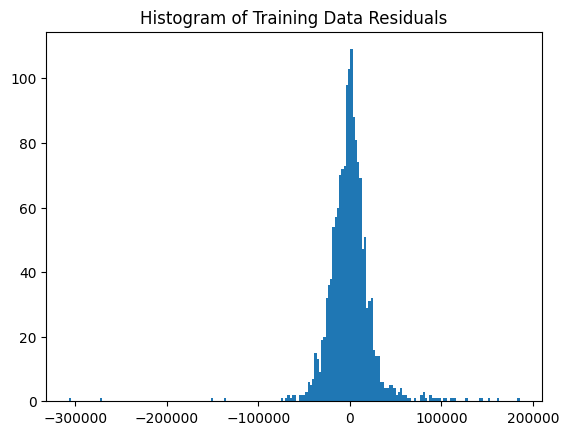

In [11]:
y_pred = ridge_cv.predict(X_train)
train_resids = y_train - y_pred
plt.hist(train_resids, bins = 200);
plt.title('Histogram of Training Data Residuals');

The residuals of the training data are normally distributed, which implies that my model is adequately capturing the underlying patterns in the data.

 #### Training RMSE Calculation (Ridge Regression)

In [12]:
y_hat = [np.median(y_train) for i in y_train]
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(train_rmse)

25777.0723176663


## Comparison to Baseline

Before we proceed, I'll set up some baseline numbers that we can use to determine if our model is capable of beating the baseline (median) predicted values.

In [13]:
# Compute the median value of y_train
y_median = np.median(y_train)

# Compute the base RMSE
y_hat = np.full_like(y_train, y_median)
base_rmse = np.sqrt(mean_squared_error(y_train, y_hat))

# Compute the base R-squared
y_mean = np.mean(y_train)
base_r2 = 1 - np.sum((y_train - y_hat) ** 2) / np.sum((y_train - y_mean) ** 2)

print(base_rmse,base_r2)

80959.92212866423 -0.0467910425411846


After running the model on our training data, we see significant improvements on both R2 and RMSE. The baseline R2 value was ~0 and was improved to .855. A similar trend is established with RMSE, where the baseline RMSE was at ~81,039 and was reduced to 30,119.

The baseline y_pred (y_median) was calculated to be $164,900. Therefore this difference in RMSE is significant.

Later, we will evaluate our model on the test data. But first, let's check the LINE assumptions before we proceed.

## Checking LINE Assumptions

I want to check the LINE assumptions before proceeding with my model. The LINE assumptions are:

    1. Linearity: The relationship between the independent and dependent variables is linear.
    2. Independence: The observations in the dataset are independent of each other.
    3. Normal distribution: The residuals (the diff. between the observed and predicted values) are normal
    4. Equal variance: The variance of the residuals is constant across the range of the independent variables.

##### Linearity

The below paireplot shows that there is a linear relationship with the dependent continuous (selected features) and independent variables (target feature). This dataset is linear and fulfills the assumption.

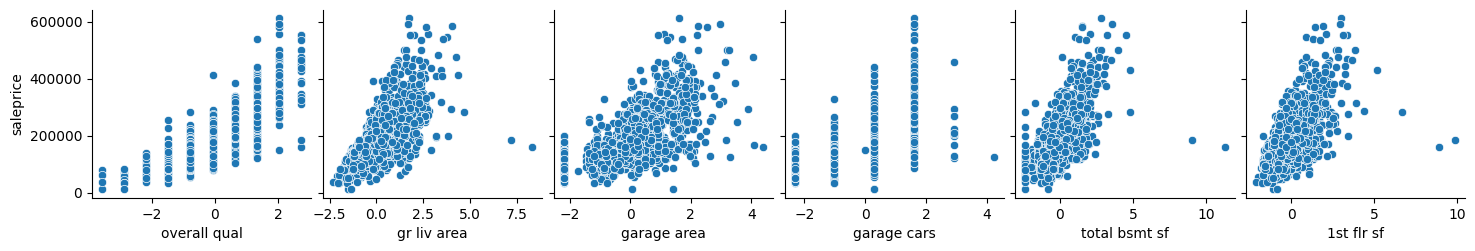

In [14]:
# Linearity check
sns.pairplot(df, x_vars= ['overall qual', 'gr liv area', 'garage area', 'garage cars',
       'total bsmt sf', '1st flr sf'], y_vars= 'saleprice');


#### Independence 

To check if the dataset is independent, I'll create a scatterplot of the resids. The values should be scattered randomly around 0 which would imply that the variables are independent of each other.

The scatterplot below shows that the data fulfills the independence assumption.

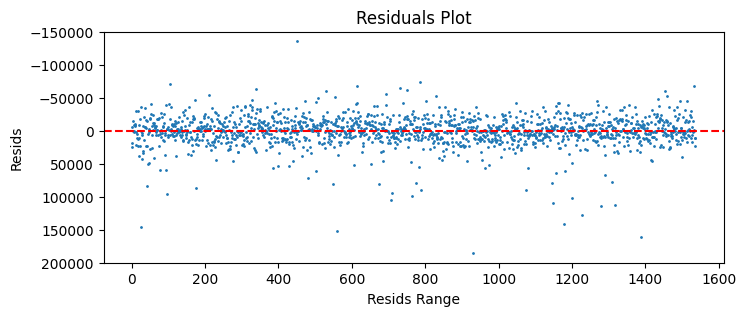

In [15]:
plt.figure(figsize = (8, 3))
plt.scatter(np.arange(len(train_resids)),train_resids,s=1);
plt.ylim(200000, -150000) # Set the x-limits

plt.title('Residuals Plot')
plt.xlabel('Resids Range')
plt.ylabel('Resids');
plt.axhline(y=0, color='red', linestyle='--');


#### Normality of Errors 

We want to determine if the residuals are normally distributed. We'll plot the resids caluclated previously and evaluate.

As shown below, the resids are normally distributed and therefore the normality assumption is fulfilled.

Text(0.5, 1.0, 'Histogram of Residuals')

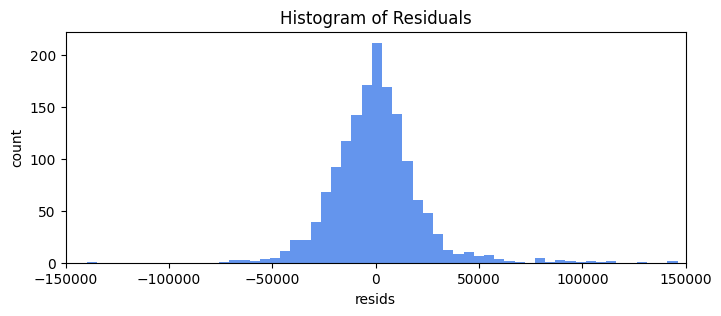

In [16]:
plt.figure(figsize = (8, 3))
plt.hist(train_resids,bins =100 ,color = 'cornflowerblue');
plt.xlim(-150000, 150000) # Set the x-limits
plt.xlabel('resids')
plt.ylabel('count')
plt.title('Histogram of Residuals')


#### Equal Variance

Lastly, we want to check if the variance of the residuals is constant across the range of the independent variables. We'll plot the residuals against the predicted y value calculated previously.

The values, shown below, are randomly scattered around the expected resids value of 0. The values do deviate more than I'd like and I will be revisiting this relationship after the first iteration of the model.

This may potentially point to error that could be removed through model iteration.

For now, the scatterplot is close enough to the expected result that we will assume the data fulfills this assumption.

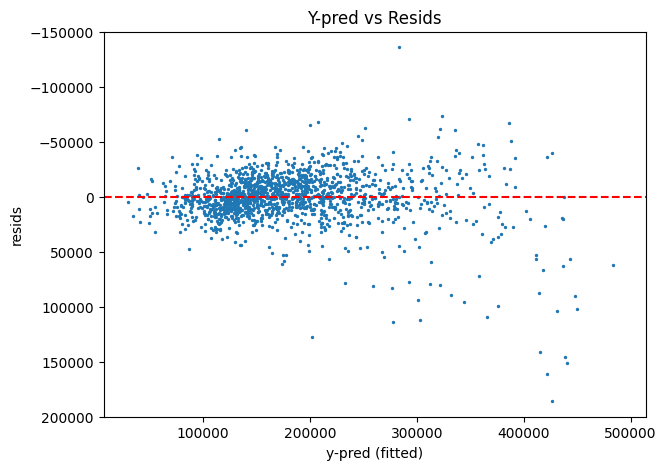

In [17]:
plt.figure(figsize = (7, 5))
plt.scatter(y_pred, train_resids, s=2)
plt.axhline(y=0, color='red', linestyle='--');
plt.ylim(200000, -150000) # Set the x-limits

plt.title('Y-pred vs Resids')
plt.xlabel('y-pred (fitted)')
plt.ylabel('resids');


# Evaluation of model on Validation Data (df_test)

From the train-test split that was completed above, we'll evaluate our model on the new data provided by the test data.

In [18]:
#continuous and categorical features list
features_test = df_test.columns

##### Running the Ridge Regression (Validation Data)

In [19]:
# setting x and y (target)
y_pred = ridge_cv.predict(X_test)
X_train = df[features]
y_train = df['saleprice']
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2050, 259), (513, 259), (2050,), (513,))

#### R2 Score Calculation

In [20]:
#testing R2
ridge_cv.score(X_test, y_test)

0.9102307076370114

In [21]:
print(f'The R2 score for my training data was {ridge_cv.score(X_train, y_train).round(2)} & {ridge_cv.score(X_test, y_test).round(2)} for my test data')

The R2 score for my training data was 0.9 & 0.91 for my test data


#### RMSE Calculation

In [22]:
rmse = (mean_squared_error(y_test, y_pred)**.5)
print(rmse)

23855.36057534634


Using the results provided above, I'll summarize my findings in the final worksheet of this analysis 

In [23]:
# write ridge to a file    
with open("pickles/ridge.pkl", "wb") as f:
    pickle.dump(ridge_cv, f)
    
# write features to a file    
with open("pickles/features.pkl", "wb") as f:
    pickle.dump(features, f)
    
with open("pickles/X.pkl", "wb") as f:
    pickle.dump(X, f)  
    
with open("pickles/y.pkl", "wb") as f:
    pickle.dump(y, f)
    
with open("pickles/X_train.pkl", "wb") as f:
    pickle.dump(X_train, f)
    
with open("pickles/y_train.pkl", "wb") as f:
    pickle.dump(y_train, f)  